In [61]:
# import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier


from sklearn import tree

In [4]:
# load the data
df = pd.read_csv("data/ai_assistant_usage_student_life.csv")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [5]:
# eliminate columns with multicollinearity 
df.drop(columns =['SessionID', 'SessionDate'], inplace=True )

# change dtype UsedAgain
df["UsedAgain"]= df["UsedAgain"].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StudentLevel        10000 non-null  object 
 1   Discipline          10000 non-null  object 
 2   SessionLengthMin    10000 non-null  float64
 3   TotalPrompts        10000 non-null  int64  
 4   TaskType            10000 non-null  object 
 5   AI_AssistanceLevel  10000 non-null  int64  
 6   FinalOutcome        10000 non-null  object 
 7   UsedAgain           10000 non-null  int32  
 8   SatisfactionRating  10000 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 664.2+ KB


In [7]:
# find categorical columns in the data set
categ_cols = df.select_dtypes(include=['object', 'bool']).columns
categ_cols

Index(['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome'], dtype='object')

In [8]:
# find numeric columns in the data set
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'UsedAgain',
       'SatisfactionRating'],
      dtype='object')

In [9]:
# encoding categorical columns

df_encoded = pd.get_dummies(df, columns = ['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome'])

# categorise and concatenate the bool dtype column "UsedAgain"
df_encoded = pd.get_dummies(df, columns = ['UsedAgain'], drop_first=True)

In [10]:
categorical_cols = ['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome']
le_dict = {}  # To store LabelEncoders for each column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StudentLevel        10000 non-null  int32  
 1   Discipline          10000 non-null  int32  
 2   SessionLengthMin    10000 non-null  float64
 3   TotalPrompts        10000 non-null  int64  
 4   TaskType            10000 non-null  int32  
 5   AI_AssistanceLevel  10000 non-null  int64  
 6   FinalOutcome        10000 non-null  int32  
 7   UsedAgain           10000 non-null  int32  
 8   SatisfactionRating  10000 non-null  float64
dtypes: float64(2), int32(5), int64(2)
memory usage: 507.9 KB


In [12]:
df["UsedAgain"]= df["UsedAgain"].astype(int)

In [13]:
df_copy =df

df_copy.head()

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,2,2,31.20,11,4,2,0,1,1.0
1,2,6,13.09,6,4,3,0,1,2.0
2,2,1,19.22,5,1,3,0,1,3.3
3,2,2,3.70,1,1,3,0,1,3.5
4,2,6,28.12,9,5,3,0,1,2.9


### Decision Tree Classifier

Predict 'FinalOutcome'

In [14]:
# features
X= df.drop("FinalOutcome", axis=1)
# target
y = df["FinalOutcome"]

print(X.shape)
print(y.shape)

(10000, 8)
(10000,)


In [15]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# load model
dclf= DecisionTreeClassifier(random_state=42)

In [17]:
# fit training data
dclf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
# predict test data
y_pred = dclf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"accuracy score: {accuracy} ")

accuracy score: 0.379 


In [19]:
# perform cross validation on dataset
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dclf, X, y, cv=5, scoring='accuracy')
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.3758


### Logistic Regression

Predict used again

In [20]:
# features
X = df.drop("UsedAgain", axis=1)

# target
y= df["UsedAgain"]

print(X.shape)
print(y.shape)


(10000, 8)
(10000,)


In [21]:
# split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# model

log_model= LogisticRegression(random_state=42)

log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"accuracy score: {accuracy} ")

accuracy score: 0.6925 


### Random Forest Classifier 

Predict final Outcome

In [24]:
# features
X = df_copy.drop("FinalOutcome", axis=1)

# target
y= df_copy["FinalOutcome"]
print(X.shape)
print(y.shape)

(10000, 8)
(10000,)


In [25]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# load model
rclf_model= RandomForestClassifier(random_state=42,class_weight='balanced', n_estimators=90)

In [27]:
rclf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 90,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [28]:
# fit training data
rclf_model.fit(X_train, y_train)

,n_estimators,90
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
y_pred = rclf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"accuracy score: {accuracy} ")
print(f"classification report: {class_report }")

accuracy score: 0.4555 
classification report:               precision    recall  f1-score   support

           0       0.52      0.72      0.60       953
           1       0.32      0.26      0.29       323
           2       0.26      0.08      0.12       151
           3       0.35      0.22      0.27       573

    accuracy                           0.46      2000
   macro avg       0.36      0.32      0.32      2000
weighted avg       0.42      0.46      0.42      2000



### KNN

In [30]:
# predict UsedAgain
# features
X= df_copy.drop("UsedAgain", axis=1)

# target
y= df_copy["UsedAgain"]

In [31]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# load scalar to standardize data
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print(X_train_scaled)

In [33]:
# load model
knn_model= KNeighborsClassifier(n_neighbors=5)

In [34]:
# fit training data
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [35]:
# predict test data
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"accuracy score: {accuracy} ")
print(f"classification report: {class_report }")

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


accuracy score: 0.7035 
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.71      1.00      0.83      1413

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.70      0.58      2000



### Naive Bayes Classifer 

In [36]:
# predict UsedAgain
# features
X= df_copy.drop("FinalOutcome", axis=1)

# target
y= df_copy["FinalOutcome"]

In [37]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# load model
naive_model= MultinomialNB()

In [39]:
# fit data
naive_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [40]:
# predict test data
y_pred = naive_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"accuracy score: {accuracy} ")
print(f"classification report: {class_report }")

accuracy score: 0.473 
classification report:               precision    recall  f1-score   support

           0       0.48      0.98      0.64       953
           1       0.00      0.00      0.00       323
           2       0.12      0.01      0.02       151
           3       0.30      0.02      0.03       573

    accuracy                           0.47      2000
   macro avg       0.23      0.25      0.17      2000
weighted avg       0.32      0.47      0.32      2000



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Gradient Boosting CLassifier

In [41]:
# predict UsedAgain
# features
X= df_copy.drop("UsedAgain", axis=1)

# target
y= df_copy["UsedAgain"]

In [42]:
# split datra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# load model
gbc_model= GradientBoostingClassifier()

In [44]:
# fit training data
gbc_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [45]:
# predict test data
y_pred = gbc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"accuracy score: {accuracy} ")
print(f"classification report: {class_report }")

accuracy score: 0.7395 
classification report:               precision    recall  f1-score   support

           0       0.57      0.45      0.50       587
           1       0.79      0.86      0.82      1413

    accuracy                           0.74      2000
   macro avg       0.68      0.66      0.66      2000
weighted avg       0.73      0.74      0.73      2000



### XGBoost Classifier

In [46]:
# predict FinalOutcome
# features
X= df_copy.drop("FinalOutcome", axis=1)

# target
y= df_copy["FinalOutcome"]

In [47]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# load model
xgb_model= XGBClassifier()

In [49]:
# fit training data
xgb_model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [50]:
# predict test data
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"accuracy score: {accuracy}")
print(f"classification report: {class_report }")

accuracy score: 0.4495
classification report:               precision    recall  f1-score   support

           0       0.53      0.70      0.60       953
           1       0.33      0.23      0.27       323
           2       0.18      0.07      0.10       151
           3       0.32      0.25      0.28       573

    accuracy                           0.45      2000
   macro avg       0.34      0.31      0.32      2000
weighted avg       0.41      0.45      0.42      2000



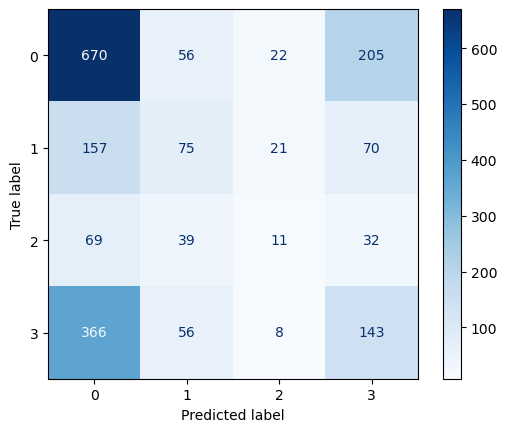

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# communicate results

y_pred =xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap="Blues")

In [59]:
# Comparing the models on "UsedAgain"
# features
X= df.drop("UsedAgain", axis=1)

# target
y=df["UsedAgain"]

# split the data

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

# scale data
scaler=StandardScaler()
x_train_scaled= scaler.fit_transform(X_train)
x_test_scaled = scaler.fit(X_test)

# load the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN':KNeighborsClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier()
}



In [62]:
results={}

for name, model in models.items():
    #     use scaled data for some models 
    if name in ['Logistic Regression', 'Naive Bayes', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred= model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test,y_pred),
        "Precision":precision_score(y_test,y_pred),
        "Recall": recall_score(y_test,y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression    0.6925   0.692500  1.000000  0.818316
Decision Tree          0.6150   0.729306  0.706137  0.717535
Random Forest          0.7230   0.757595  0.882310  0.815210
Naive Bayes            0.6920   0.692539  0.998556  0.817859
KNN                    0.6415   0.698573  0.848375  0.766221
Gradient Boosting      0.7430   0.788602  0.859206  0.822391
XGBoost                0.7215   0.761694  0.870036  0.812268


Gradient boosting offers a balanced model for predictions